## Preliminary/Exploratory Analysis of the Data

In [1]:
# Load necessary library

import pandas as pd

In [7]:
# Load the dataset

diabetes = pd.read_csv("data/raw/diabetes_data_upload.csv")
diabetes

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


### Data Inspection

In [ ]:
# Summary of data types and missing values

diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [ ]:
# Check for missing or null values

diabetes.isnull().sum()     # there are no missing/null values

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [ ]:
# View unique values in each column

for col in diabetes.columns:
    print(f"{col}: {diabetes[col].unique()}")

Age: [40 58 41 45 60 55 57 66 67 70 44 38 35 61 54 43 62 39 48 32 42 52 53 37
 49 63 30 50 46 36 51 59 65 25 47 28 68 56 31 85 90 72 69 79 34 16 33 64
 27 29 26]
Gender: ['Male' 'Female']
Polyuria: ['No' 'Yes']
Polydipsia: ['Yes' 'No']
sudden weight loss: ['No' 'Yes']
weakness: ['Yes' 'No']
Polyphagia: ['No' 'Yes']
Genital thrush: ['No' 'Yes']
visual blurring: ['No' 'Yes']
Itching: ['Yes' 'No']
Irritability: ['No' 'Yes']
delayed healing: ['Yes' 'No']
partial paresis: ['No' 'Yes']
muscle stiffness: ['Yes' 'No']
Alopecia: ['Yes' 'No']
Obesity: ['Yes' 'No']
class: ['Positive' 'Negative']


In [ ]:
# Count of Positive/Negative by class

diabetes.groupby('class').size()

class
Negative    200
Positive    320
dtype: int64

In [ ]:
# Count of Female/Male by Gender

diabetes.groupby('Gender').size()

Gender
Female    192
Male      328
dtype: int64

In [18]:
# Percentage count of positive vs. negative cases to check for class imbalance

class_counts = diabetes['class'].value_counts(normalize = True)
class_counts

# roughly 62% positive and roughly 38% negative
# so we have a ratio of 60:40
    # managing class imbalance: this ratio is not too severe but it would still be important to monitor its impact on the model performance
    # especially given the fact that this minority class is 'negative'
        # its the positive cases that are really important in identifying so if we had issues with our classifiers accuracy, this is something we would want to consider

class
Positive    0.615385
Negative    0.384615
Name: proportion, dtype: float64

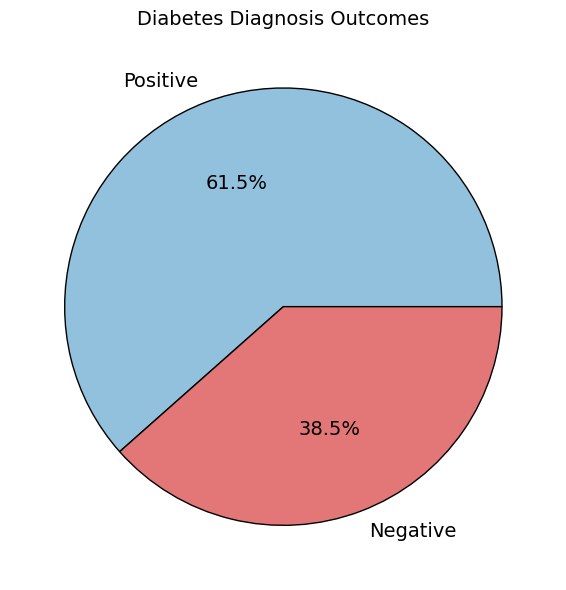

In [26]:
# Load the library
import matplotlib.pyplot as plt

# Create pie chart to show class_counts
colors = [
    "#0071B26E",
    "#E37676",
]

plt.figure(figsize=(6, 6))

plt.pie(
    class_counts,
    labels=class_counts.index,
    autopct='%1.1f%%',
    colors=colors,
    wedgeprops={'edgecolor': 'black', 'linewidth': 1},
    textprops={'fontsize': 14}
)

plt.title("Diabetes Diagnosis Outcomes", fontsize=14)
plt.tight_layout()
plt.show()

In [19]:
# Percentage count of male vs. female observations to check for class imbalance

gender_counts = diabetes['Gender'].value_counts(normalize = True)
gender_counts

# roughly 63% male and roughly 37% female
# so we have a ratio of 60:40 again
    # there is a clear gender imbalance in the dataset where there is more data for male patients than female patients
    # this means analyses or models may be more reflective of male symptom patterns unless we adjust 
        # (e.g., stratify by gender or bootstrapping)

Gender
Male      0.630769
Female    0.369231
Name: proportion, dtype: float64

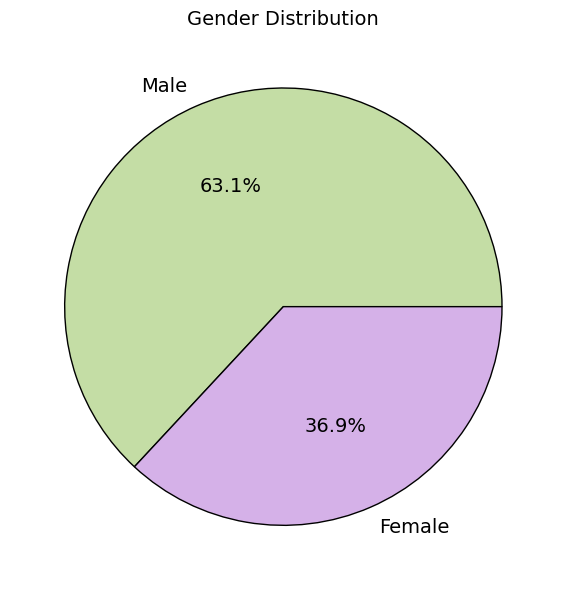

In [ ]:
# Create pie chart to show gender_counts
colors = [
    "#C4DDA5FF",
    "#D5B1E8",
]

plt.figure(figsize=(6, 6))

plt.pie(
    gender_counts,
    labels=gender_counts.index,
    autopct='%1.1f%%',
    colors=colors,
    wedgeprops={'edgecolor': 'black', 'linewidth': 1},
    textprops={'fontsize': 14}
)

plt.title("Gender Distribution", fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
# Summary statistics for Age column

diabetes.describe()

# average age within dataset is 48 with a standard deviation of 12.15
    # youngest age being 16
    # oldest age being 90
    # median age is 47.5   

,Age
count,520.000000
mean,48.028846
std,12.151466
min,16.000000
25%,39.000000
50%,47.500000
75%,57.000000
max,90.000000


In [ ]:
# Summary statistics to include categorical columns

diabetes.describe(include='object')

,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
count,520,520,520,520,520,520,520,520,520,520,520,520,520,520,520,520
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,Male,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,Positive
freq,328,262,287,303,305,283,404,287,267,394,281,296,325,341,432,320


In [ ]:
# Count of positive/negative by gender

pd.crosstab(diabetes['Gender'], diabetes['class'])

class,Negative,Positive
Gender,,
Female,19,173
Male,181,147


In [ ]:
# One-hot encoding

diabetes_encoded = diabetes.replace({'Yes': 1, 'No': 0, 'Positive': 1, 'Negative': 0, 'Male': 1, 'Female': 0})

In [4]:
# Correlation matrix

diabetes_encoded.corr()['class'].sort_values(ascending=False)

# closer to 1 or -1 shows a strong positive/negative association

class                 1.000000
Polyuria              0.665922
Polydipsia            0.648734
sudden weight loss    0.436568
partial paresis       0.432288
Polyphagia            0.342504
Irritability          0.299467
visual blurring       0.251300
weakness              0.243275
muscle stiffness      0.122474
Genital thrush        0.110288
Age                   0.108679
Obesity               0.072173
delayed healing       0.046980
Itching              -0.013384
Alopecia             -0.267512
Gender               -0.449233
Name: class, dtype: float64

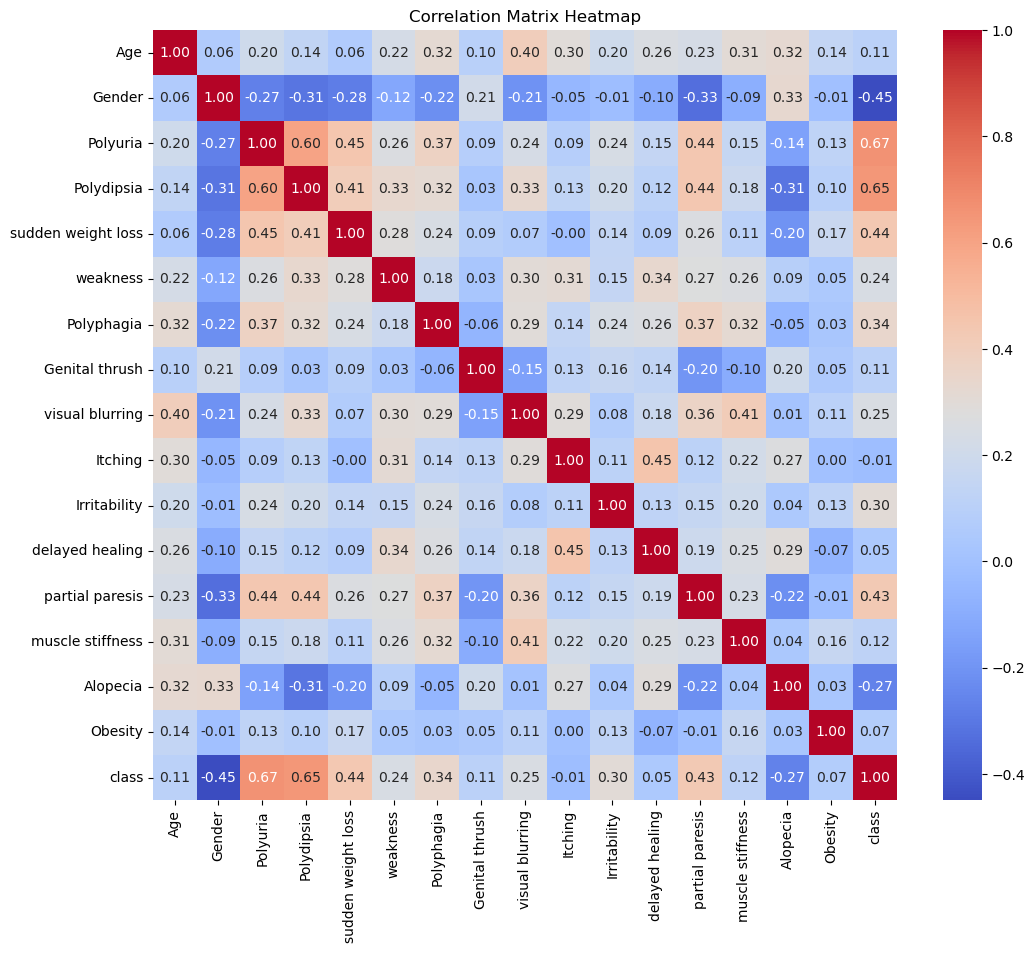

In [ ]:
# Load necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Correlation matrix visualized
corr_matrix = diabetes_encoded.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

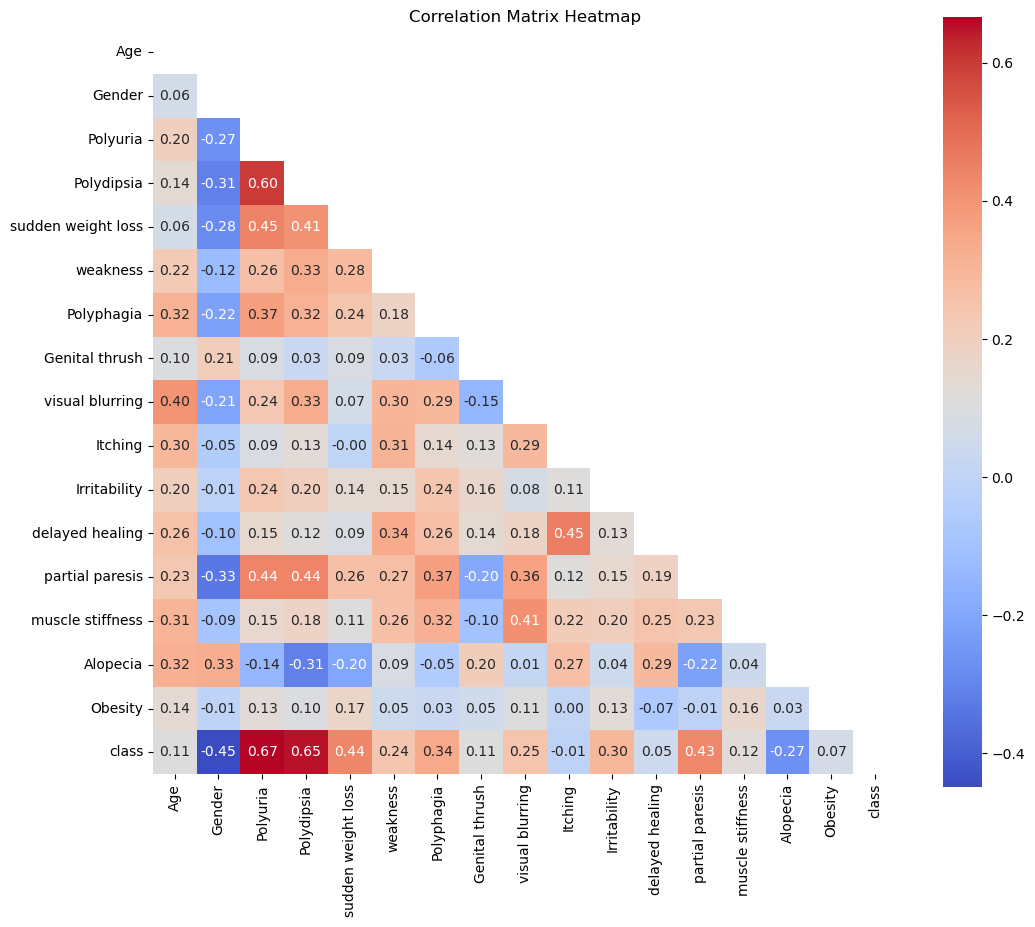

In [ ]:
# Lower triangle correlation matrix visualized
corr = diabetes_encoded.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(12, 10))
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [ ]:
# List all the symptom columns (ignore age, gender, and class)
symptom_cols = []
for col in diabetes.columns:
    if col not in ['Age', 'Gender', 'class']:
        symptom_cols.append(col)


# Get value counts for each symptom
value_counts_sym = diabetes[symptom_cols].apply(pd.Series.value_counts)
value_counts_sym

,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
No,262,287,303,215,283,404,287,267,394,281,296,325,341,432
Yes,258,233,217,305,237,116,233,253,126,239,224,195,179,88
